In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [2]:
dt = pd.read_csv('general_data.csv')

In [3]:
dt.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
dt.shape

(4410, 24)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [6]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [7]:
dt = dt.drop(['EmployeeCount','EmployeeID','Over18','StandardHours'],axis=1)

In [8]:
le = LabelEncoder()

In [9]:
dt.BusinessTravel = le.fit_transform(dt.BusinessTravel)
dt.Department = le.fit_transform(dt.Department)
dt.EducationField = le.fit_transform(dt.EducationField)
dt.Gender = le.fit_transform(dt.Gender)
dt.JobRole = le.fit_transform(dt.JobRole)
dt.MaritalStatus = le.fit_transform(dt.MaritalStatus)

In [10]:
dt.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
dt = dt.dropna()

In [12]:
x = dt.drop(['Attrition'],axis=1)
y = dt['Attrition']

In [13]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [14]:
rf = RandomForestClassifier(n_estimators=1000, oob_score=True, max_features=2)
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
for feature,imp in zip(train_x.columns,rf.feature_importances_):
    print(f"{feature}  {imp}")

Age  0.09769288523072421
BusinessTravel  0.027421816928196115
Department  0.025675909333592702
DistanceFromHome  0.06808916124340249
Education  0.041537444497026885
EducationField  0.04205618147958152
Gender  0.01889173458181525
JobLevel  0.03719994504615225
JobRole  0.055194953182537185
MaritalStatus  0.03949912918638533
MonthlyIncome  0.09350516731363548
NumCompaniesWorked  0.055098980992139626
PercentSalaryHike  0.06424547419088769
StockOptionLevel  0.03335065243451099
TotalWorkingYears  0.08635421705111983
TrainingTimesLastYear  0.04330758144806046
YearsAtCompany  0.07185347305619244
YearsSinceLastPromotion  0.04341735568373923
YearsWithCurrManager  0.05560793712030038


In [16]:
features = []
for feature,imp in zip(train_x.columns,rf.feature_importances_):
    if imp >= 0.04:
        features.append(feature)

In [17]:
features

['Age',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'JobRole',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [18]:
x = dt[features]

In [19]:
tree_model = DecisionTreeClassifier(random_state=42)

In [20]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state = 42)

In [21]:
tree_model.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [22]:
tree_model.score(train_x, train_y)

1.0

In [23]:
tree_model.score(test_x, test_y)

0.9965792474344356

In [24]:
with open("Attrition_tree.dot",'w') as f:
    f = export_graphviz(tree_model, feature_names=features, out_file=f)

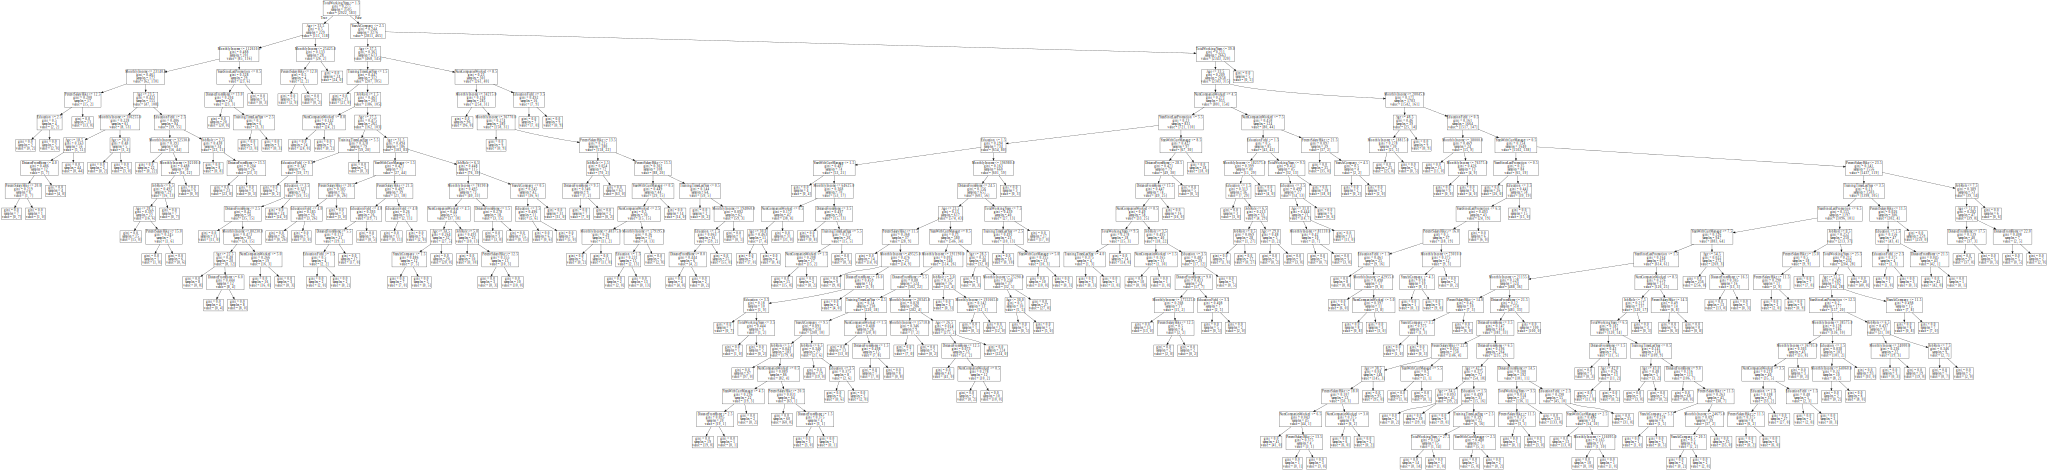

In [25]:
import graphviz
with open("Attrition_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)